# GEOG 5160 6160 Lab 07

## Data processing

Let's start by by importing the modules we'll need for the class:

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
## Set random seed for reproducibility
np.random.seed(1234)

As before, we will start by loading and cleaning the dataset for us. There are several steps we need to take here:

- Remove observations with missing values
- Create variables containing the average number of bedrooms and rooms per district
- Create a Boolean (0/1) variable indicating whether a district is high value or not. We'll define this as being when the median house value for that district is over $250K

Now load the data and use the `describe()` method to remind us of the available variables/features

In [2]:
housing = pd.read_csv("../datafiles/housing.csv")
print(housing.shape)

(20640, 10)


In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


First use the `dropna()` method to remove missing values:

In [4]:
housing = housing.dropna()
housing.shape

(20433, 10)

Next, we'll create the features with the average number of rooms and bedroom ratio.

In [5]:
housing['avg_rooms'] = housing.total_rooms / housing.households
housing['bedroom_ratio'] = housing.total_bedrooms / housing.total_rooms

Now, we'll create two categorical features for use in the model, both binary. For the first of these, we'll convert the `ocean_proximity` feature into a binary value. This requires a few steps: first we convert this to two groups by with a conditional statement (INLAND vs all other locations); then we convert this to a categorical Series and extract the numerical codes (0/1) using `.cat.codes`. 

In [6]:
ocean_cats = housing.ocean_proximity != "INLAND" ## Conditional to make two groups inland vs all others
ocean_cats = ocean_cats.astype('category') ## Convert to categorical
ocean_cats = ocean_cats.cat.codes ## Extract the code numerical labels (0/1)
housing['ocean_new'] = ocean_cats ## Replace original ocean_proximity

Next we convert the `median_house_value` to a binary outcome of low vs. high house values. We'll initially do this as labels (`low`, `high`). To do this we use Pandas `cut()` function. For $k$ groups, this requires a vector of cuts of length $k+1$, and optionally a vector of labels for the new groups of length $k$. 

In [7]:
bins = [0, 2.5e5, np.inf]
labels = ['low', 'high']
housing['mhv_new'] = pd.cut(housing.median_house_value, bins, labels = labels)

Now let's look at the new data

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_rooms,bedroom_ratio,ocean_new
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,0.213039,0.682083
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,0.057983,0.465678
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,0.175427,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,0.203162,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,0.239821,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1.000000,1.000000


In [9]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,bedroom_ratio,ocean_new,mhv_new
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,1,high
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,1,high
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,1,high
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,1,high
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,1,high


We can make a quick barplot to show the distribution of our house value categories. This suggests that the data are unbalanced, with more observations in the low than in the high category. We'll want to account for this when designing resampling strategies. 

<AxesSubplot:xlabel='mhv_new', ylabel='count'>

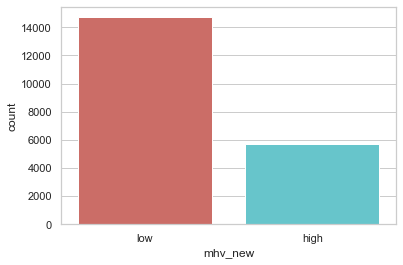

In [10]:
sns.countplot(x="mhv_new", data=housing, palette='hls')

## Setting up data for scikit-learn

Let's make new DataFrames: one with a subset of variables or features for building our initial model (`X`), and one with the outcome or labels (`y`). We're going to center the continuous variables, so we have to a little more work here than previously. There are a couple of ways to do this, and we'll go through both of them here. 

In the first method:

- We first extract the subset of variables in to a new DataFrame `X`. 
- Then we take advantage of Pandas `mean()` method to subtract the columns means from each column and create a new DataFrame (`X_scaled`) 
- As this also removes the mean from the binary variable representing proximity to ocean (`ocean_new`), we replace it with the original value from the `housing` DataFrame. 

If we now look at the summary of the data, you should see that the mean of all numeric variables is 0 (or close to it). 

In [11]:
X = housing[['avg_rooms', 'bedroom_ratio', 'housing_median_age', 'median_income', 
             'population', 'ocean_new']]
X_scaled = X - X.mean()
X_scaled.ocean_new = housing.ocean_new
X_scaled.describe()

,avg_rooms,bedroom_ratio,housing_median_age,median_income,population,ocean_new
count,2.043300e+04,2.043300e+04,20433.000000,2.043300e+04,2.043300e+04,20433.000000
mean,-1.669165e-17,1.390971e-17,0.000000,6.008995e-16,-9.685609e-14,0.682083
std,2.482946e+00,5.798267e-02,12.591805,1.899291e+00,1.133208e+03,0.465678
min,-4.585190e+00,-1.130388e-01,-27.633094,-3.371262e+00,-1.421947e+03,0.000000
25%,-9.899025e-01,-3.761145e-02,-10.633094,-1.307462e+00,-6.379469e+02,0.000000
50%,-2.005747e-01,-9.876396e-03,0.366906,-3.346616e-01,-2.589469e+02,1.000000
75%,6.210370e-01,2.678186e-02,8.366906,8.728384e-01,2.970531e+02,1.000000
max,1.364777e+02,7.869612e-01,23.366906,1.112894e+01,3.425705e+04,1.000000


A second way to do this transformation is by using scikit-learn's preprocessing toolkit (called, not surprisingly, `preprocessing`).  

- Import the `StandarScaler` function from `preprocessing
- Create an array of column names
- Use this to create a subset of the original features from `housing` into a new matrix `X`
- Create an object `scaler` using `StandardScaler()`. This is an object that holds information about the type of transformation we want to do. By default, this method will standardized numeric variables by first subtracting the mean, then dividing by the standard deviation. The argument `with_std=False` stops this second step. 
- Once this is set up, we use the `fit()` method to apply this to `X`. As this requires a NumPy array, rather than a Pandas DataFrame, we apply it to the `values()` of `X`
- We then back convert this to a Pandas DataFrame (and use the `col_names` array to set the column names)
- Finally we add the `ocean_new` column to our new scaled DataFrame. To allow us to copy the values directly over from one DataFrame to another, we first have to make sure the indices align. The easiest way to do this is to simply copy the `housing` index to the `X_scaled` index 

This is obviously more work than the first way, but it allows a much wider range of data transformations, and we'll illustrate that later on. 

In [12]:
from sklearn.preprocessing import StandardScaler
col_names = ['avg_rooms', 'bedroom_ratio', 'housing_median_age', 'median_income', 
             'population', 'ocean_new']
X = housing[col_names]
scaler = StandardScaler(with_std=False).fit(X.values)
X_scaled = pd.DataFrame(scaler.transform(X.values), columns = col_names)
X_scaled.index = housing.index
X_scaled['ocean_new'] = housing.ocean_new

We also need to create our array of labels (the `mhv_new` variable created earlier). For some ML methods, we can use the text labels, but other methods require this to be a binary (0/1) vector, so we'll create one of those where low value = 0 and high value = 1. 

We could re-use the code we used earlier to create the `ocean_new` variable, but instead, we're going to use a Pandas function: `get_dummies()`, which provides a little more control over how this binary encoding is set up. If we run this, and look at the output, you'll see that it has create two columns. 

In [13]:
mhv_dummies = pd.get_dummies(housing.mhv_new)
print(mhv_dummies)

       low  high
0        0     1
1        0     1
2        0     1
3        0     1
4        0     1
...    ...   ...
20635    1     0
20636    1     0
20637    1     0
20638    1     0
20639    1     0

[20433 rows x 2 columns]


The first encodes for the low values (i.e. 1 = low) and the second encodes for high values (i.e. 1 = high). As we want to model the probability of a district being high value, we can then create our `y` series using the second column. If we were interested in the probability of a district being low value, we could use the first of these two columns as our label.

This form of encoding is called 'one-hot' encoding and several uses in machine learning, especially with text analysis.

In [14]:
y = mhv_dummies.high
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: high, Length: 20433, dtype: uint8


## Training/test split

We'll set up a couple of different strategies for testing our models. First, a holdout method with 80% of the data in the training set (this will be used for initial tests). As we noted previously that the data are unbalanced with more 'low' value districts than 'high' value ones, we use the argument `stratify` to do, well, stratified sampling. This will force the training and testing datasets to have the same proportion of low and high value districts as in the full dataset. 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    train_size = 0.8,
                                                    stratify = y)

Next, a 5-fold cross-validation strategy (this will be used to get the final estimate of model skill). Unlike the previous lab, we use the stratified version of $K$-fold cross-validation to keep the proportions of low/high value districts consistent across all folds.

In [16]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
# define model evaluation method
cv = StratifiedKFold(n_splits=5)

## Logistic regression

Now we've set up our training and testing sets, we can build the model. The function for logistic regression is part of the linear model methods in scikit-learn, so import this, and create a new logistic regression object. This uses an optimization routine to find the best estimate of the coefficients, and works best for small datasets. As the default setting will not converge for our dataset, we increase the maximum number of iterations for the optimizer (you could alternatively try different optimizers or transformations of the data). 

The `LogisticRegression` function uses L2 (ridge) regularization by default. For this exercise, we are just going to run non-regularized regression, we set the penalty term to `none`. To see the effect of regularization, set this to `l1` or `l2`:

In [17]:
from sklearn import linear_model
log_reg = linear_model.LogisticRegression(max_iter=200, penalty='none')

Now let's use the training data to fit it:

In [18]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200, penalty='none')

As before, we can look at the coefficients from this model:

In [19]:
cdf = pd.DataFrame(log_reg.coef_.transpose(), X_train.columns, columns=['Coefficients'])
print(cdf)

                    Coefficients
avg_rooms               0.044084
bedroom_ratio          10.431983
housing_median_age      0.039457
median_income           1.285489
population              0.000013
ocean_new               1.844405


And the intercept:

In [20]:
print(log_reg.intercept_)

[-2.82137429]


### Predicting with the test set

Next step is to predict the the value of `mhv_new` for for the testing set. If we use the `predict` method, then the values are 0's or 1's. Although the model predicts a probability of a district being high value, this uses a probability threshold of 0.5 probability to distinguish between low and high:

In [21]:
y_test_pred = log_reg.predict(X_test)
print(y_test_pred)

[0 0 0 ... 0 0 0]


We can use these predictions to estimate the model performance, and there are several measures that can be easily calculated from scikit-learn's metrics packages. The `classification_report` function calculates the specificity (precision), sensitivity (recall), $f1$-score and accuracy (the proportion of correctly predcited outcomes)

In [22]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2943
           1       0.77      0.61      0.68      1144

    accuracy                           0.84      4087
   macro avg       0.81      0.77      0.79      4087
weighted avg       0.83      0.84      0.83      4087



You can also see the confusion matrix showing the number of correct/incorrect predictions (the diagonal elements are the correct predictions for 0's and 1's in the test set).

In [23]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
print(cm)

[[2736  207]
 [ 451  693]]


While this gives us a good overview of the model performance, the threshold of 0.5 might not be the best way to differentiate between 0's and 1's. To avoid this, we can use the AUC of the receiver operating charactistic (ROC) curve, which is not based on a single threshold. To calculate this, we need the actual predicted probabilities of a district being high value. To get these, we use a different method: `predict_probab`. This returns a two column array where the first column is the probability of a '0' or a low value district, second column is probability of a '1' or high value district. 

In [24]:
y_test_pred = log_reg.predict_proba(X_test)
print(y_test_pred)

[[0.67106201 0.32893799]
 [0.99172499 0.00827501]
 [0.96075451 0.03924549]
 ...
 [0.60112198 0.39887802]
 [0.87768516 0.12231484]
 [0.8504935  0.1495065 ]]


As we are modeling high value districts, we can now calculate the AUC using the second column of this array. The resulting value is quite high, suggesting we have a good model even with this simple algorithm

In [25]:
metrics.roc_auc_score(y_test, y_test_pred[:,1])

0.8951776646730775

If you want to see the ROC curve that this value is derived from:

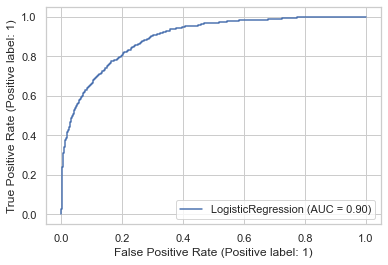

In [26]:
metrics.plot_roc_curve(log_reg, X_test, y_test) 

The ROC analysis can also be used to find the optimal threshold. There are a couple of ways to find this, but good optimal cut off point would be where true positive rate is high and the false positive rate is low. To find this, we calculate (not just plot) the ROC curve. This gives the false positive rate (`fpr`, the x-axis), the true positive rate (`tpr`, the y-axis) and the set of tested thresholds. We can use this to find the biggest difference between `tpr` and `fpr` and the associated threshold:

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred[:,1])
thresholds[np.argmax(tpr - fpr)]

0.24112635840130242

Now we'll run a 5-fold cross-validation to check the stability of the AUC score we got above, using our previously defined cross-validation strategy. 

In [28]:
scores = cross_val_score(log_reg, X_scaled, y, cv=cv, scoring = 'roc_auc')

In [29]:
with np.printoptions(precision=3, suppress=True):
    print(scores)
print("%.3f" % np.mean(scores))

[0.894 0.83  0.848 0.898 0.901]
0.874


This suggests that our previous AUC score was a little overestimated, and there is some variability across our subsets of data. 

## Naive Bayes

The Naive Bayes approach tries to establish the conditional probability of any class given the values of the input features. Whichever class has the highest overall probability will be used as a prediction for a new case. These conditional probabilities are built either:

- Categorical features: Looking for the relative number of times an output class co-occurs with a feature class 
- Continuous features: Building a probability function to relate values of the feature to the likelihood of a class (usually based on the mean and s.d. values of the feature for that class)

scikit-learn has a couple of different function for Naive Bayes models, which mainly differ in some assumptions about the probabilities. We'll use `GaussianNB` to fit a model, which assumes (surprisingly) a Gaussian distribution.

As we have already set up our data and cross-validation strategy, we simply need to load the new method:

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

And run the cross validation:

In [31]:
scores = cross_val_score(gnb, X_scaled, y, cv=cv, scoring = 'roc_auc')
with np.printoptions(precision=3, suppress=True):
    print(scores)
print("%.3f" % np.mean(scores))

[0.867 0.735 0.836 0.872 0.899]
0.842


The results are worse than the logistic regression. This is not too surprising; while the Naive Bayes is a very efficient classifier it is known to be relatively poor in making predictions. It's main use is in classifying large text documents. 

## Support vector machine

The last algorithm we will look at today is a support vector machine (SVM). For classification, these work by projecting the dataset in a parameter space defined by the features, then finding a plane or hyperplane that best discriminates between the classes. 

This algorithm is sensitive to the values of the features that are used. Any feature with large magnitudes (e.g. income) will have disproportionate effect on the fitted model. In order to avoid this, we are going to scale are features to $z$-scores. To do this, we need subtract the mean, and divide by the standard deviation. Rather than doing this by hand, we'll use the `StandardScaler` function introduced above and set the argument `with_std` to `True`. As before, this will also scale the binary variable `ocean_new` so we replace this with the original values.

In [32]:
scaler = StandardScaler(with_std=True).fit(X.values)
X_scaled = pd.DataFrame(scaler.transform(X.values), columns = col_names)
X_scaled.index = housing.index
X_scaled['ocean_new'] = housing.ocean_new

As we've rescaled the data, we'll need to remake the training/test split. We could skip this step and go straight to the cross-validation, but this allows us to see some of the results of the SVM algorithm.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    train_size = 0.8,
                                                    stratify = y)

Now we'll set up a support vector machine with a linear kernel and fit it to the training data:

In [34]:
from sklearn import svm
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

SVC(kernel='linear')

We can now look at some of the output. To see the number of support vectors for each class:

In [35]:
support_vectors_per_class = linear_svc.n_support_
print(support_vectors_per_class)

[3185 3185]


This model has a few thousand support vectors, suggesting that the dividing hyperplane is quite complex. You can also access the row numbers of each support vector with `support_` and the support vectors themselves with `support_vectors_`. For example:

In [36]:
# Get support vector indices
support_vector_indices = linear_svc.support_
print(support_vector_indices)

[    0     9    11 ... 16334 16337 16338]


Now let's go ahead and run the $k$-fold cross-validation for this model (which gives a marginal improvement over the logistic model):

In [37]:
scores = cross_val_score(linear_svc, X_scaled, y, cv=cv, scoring = 'roc_auc')
with np.printoptions(precision=3, suppress=True):
    print(scores)
print("%.3f" % np.mean(scores))

[0.911 0.843 0.861 0.905 0.898]
0.884


Let's now compare this to a SVM built with a radial basis kernel. As before, we set up the SVM (just with a different kernel definition), and run the cross-validation:

In [38]:
rbf_svc = svm.SVC(kernel='rbf')
scores = cross_val_score(rbf_svc, X_scaled, y, cv=cv, scoring = 'roc_auc')
with np.printoptions(precision=3, suppress=True):
    print(scores)
print("%.3f" % np.mean(scores))

[0.895 0.821 0.856 0.879 0.874]
0.865


Which is surprisingly worse than the linear kernel. This may simply suggest that the dataset is not complex enough to need the different kernel, and the linear methods are sufficient. The SVM algorithm has a couple of key hyperparameters, including $\gamma$ which modifies the RBF kernel). We'll try re-running the algorithm with $\gamma = 0.01$. The default is $1/p$ where $p$ is the number of features.

In [39]:
rbf_svc = svm.SVC(kernel='rbf', gamma=0.01)
scores = cross_val_score(rbf_svc, X_scaled, y, cv=cv, scoring = 'roc_auc')
with np.printoptions(precision=3, suppress=True):
    print(scores)
print("%.3f" % np.mean(scores))

[0.912 0.836 0.863 0.901 0.898]
0.882


Dropping $\gamma$ from the default value to 0.01 improves the model. In future labs, we'll look at automatically tuning these parameters to optimize your models. 

## Exercise

The file *Sonar.csv* contains values of 208 sonar signals. The data have 60 features, each representing "the energy within a particular frequency band, integrated over a certain period of time", and an outcome variable `Class`, which is coded `M` or `R`. The goal of the experiment is to discriminate between the sonar signals bounced of a rock `R` or a metal object (a mine `M`). 

For the exercise, you need to carry out a comparison of the three methods presented in today's lab with this new dataset. You should use the **scikit-learn** framework to set up and test your models, and report the cross-validated AUC score for each one. At the end of this exercise, you should make a recommendation as to which method you think is best for this task. 

Your answer should include

- Your jupyter notebook (or word document with your code) [2]
- A list of aggregate AUC scores, one per method [1]
- A note of any parameter settings you used (e.g. for the SVM method) [1]
- The recommendation [1]